In [4]:
## import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
## load our dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
## know your structure of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
## checking the dataset for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
## counting zeros as missing values
missing_values = (df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]==0).sum()
missing_values

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
# nan ---not a number 
## replacing zero values with Nan

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace({0:np.nan})

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

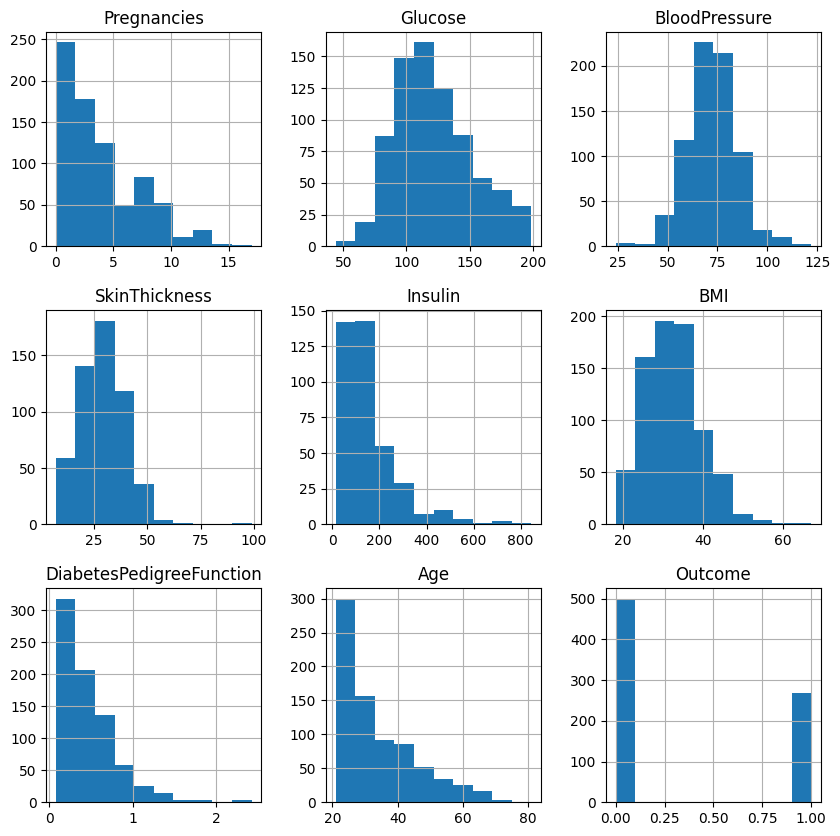

In [12]:
## plot an histogram
df.hist(bins= 10, figsize=(10,10))
plt.show()
## histogram can be skewed -- positively skewed, goes towards the right positively skewed
## mean is not affected by outliers, median is affected well b y outliers




In [13]:
## replace missing values with mean for the selected column
## glucose, bloodpressure, skinthickness, insulin and BMI
## FILLNA
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [22]:
## new dataset after replacing missing values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [25]:
df['Outcome'] = df['Outcome'].replace({1: 'Diabetic', 0: 'Non_Diabetic'})

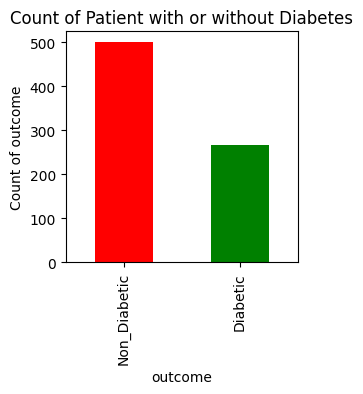

In [32]:
plt.figure(figsize=(3,3))
df['Outcome'].value_counts().plot(kind='bar', color = ['red', 'green'])
plt.xlabel('outcome')
plt.ylabel('Count of outcome')
plt.title('Count of Patient with or without Diabetes')
plt.show()

In [14]:
## plot correlation matrix
corr_mat = df.corr()
corr_mat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


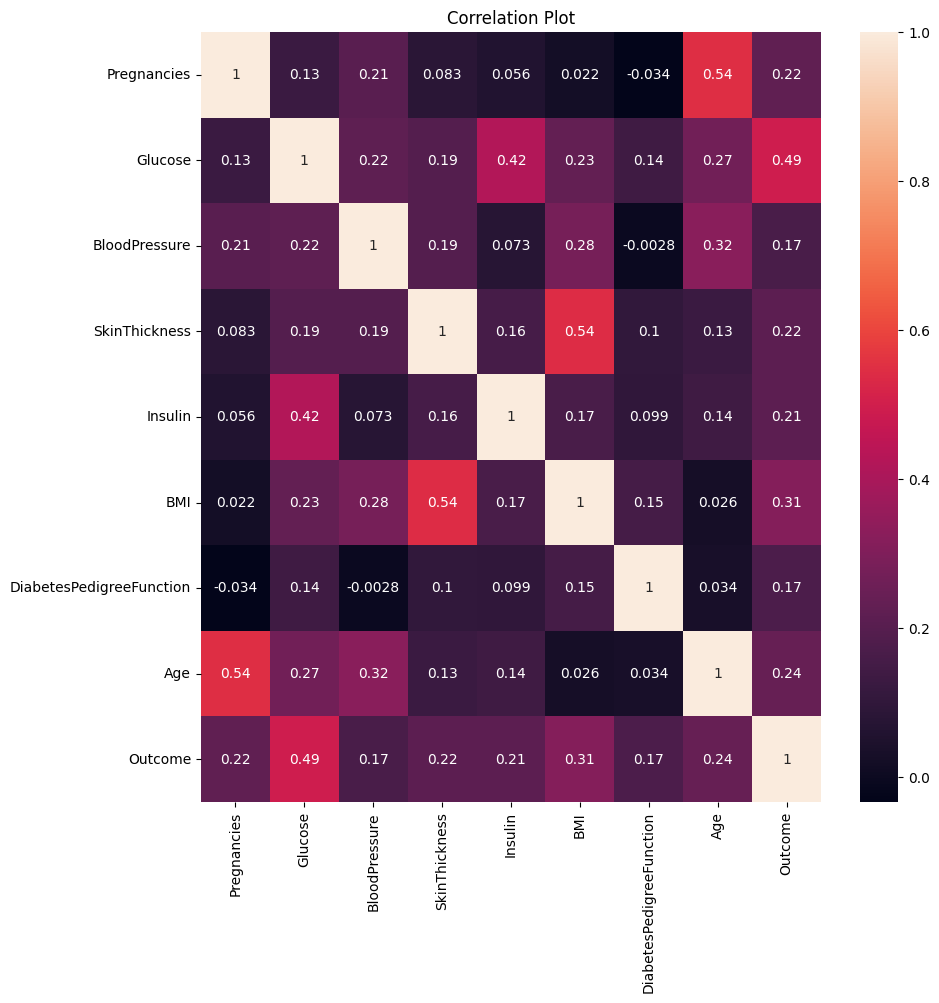

In [15]:
## heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Plot')
plt.show()

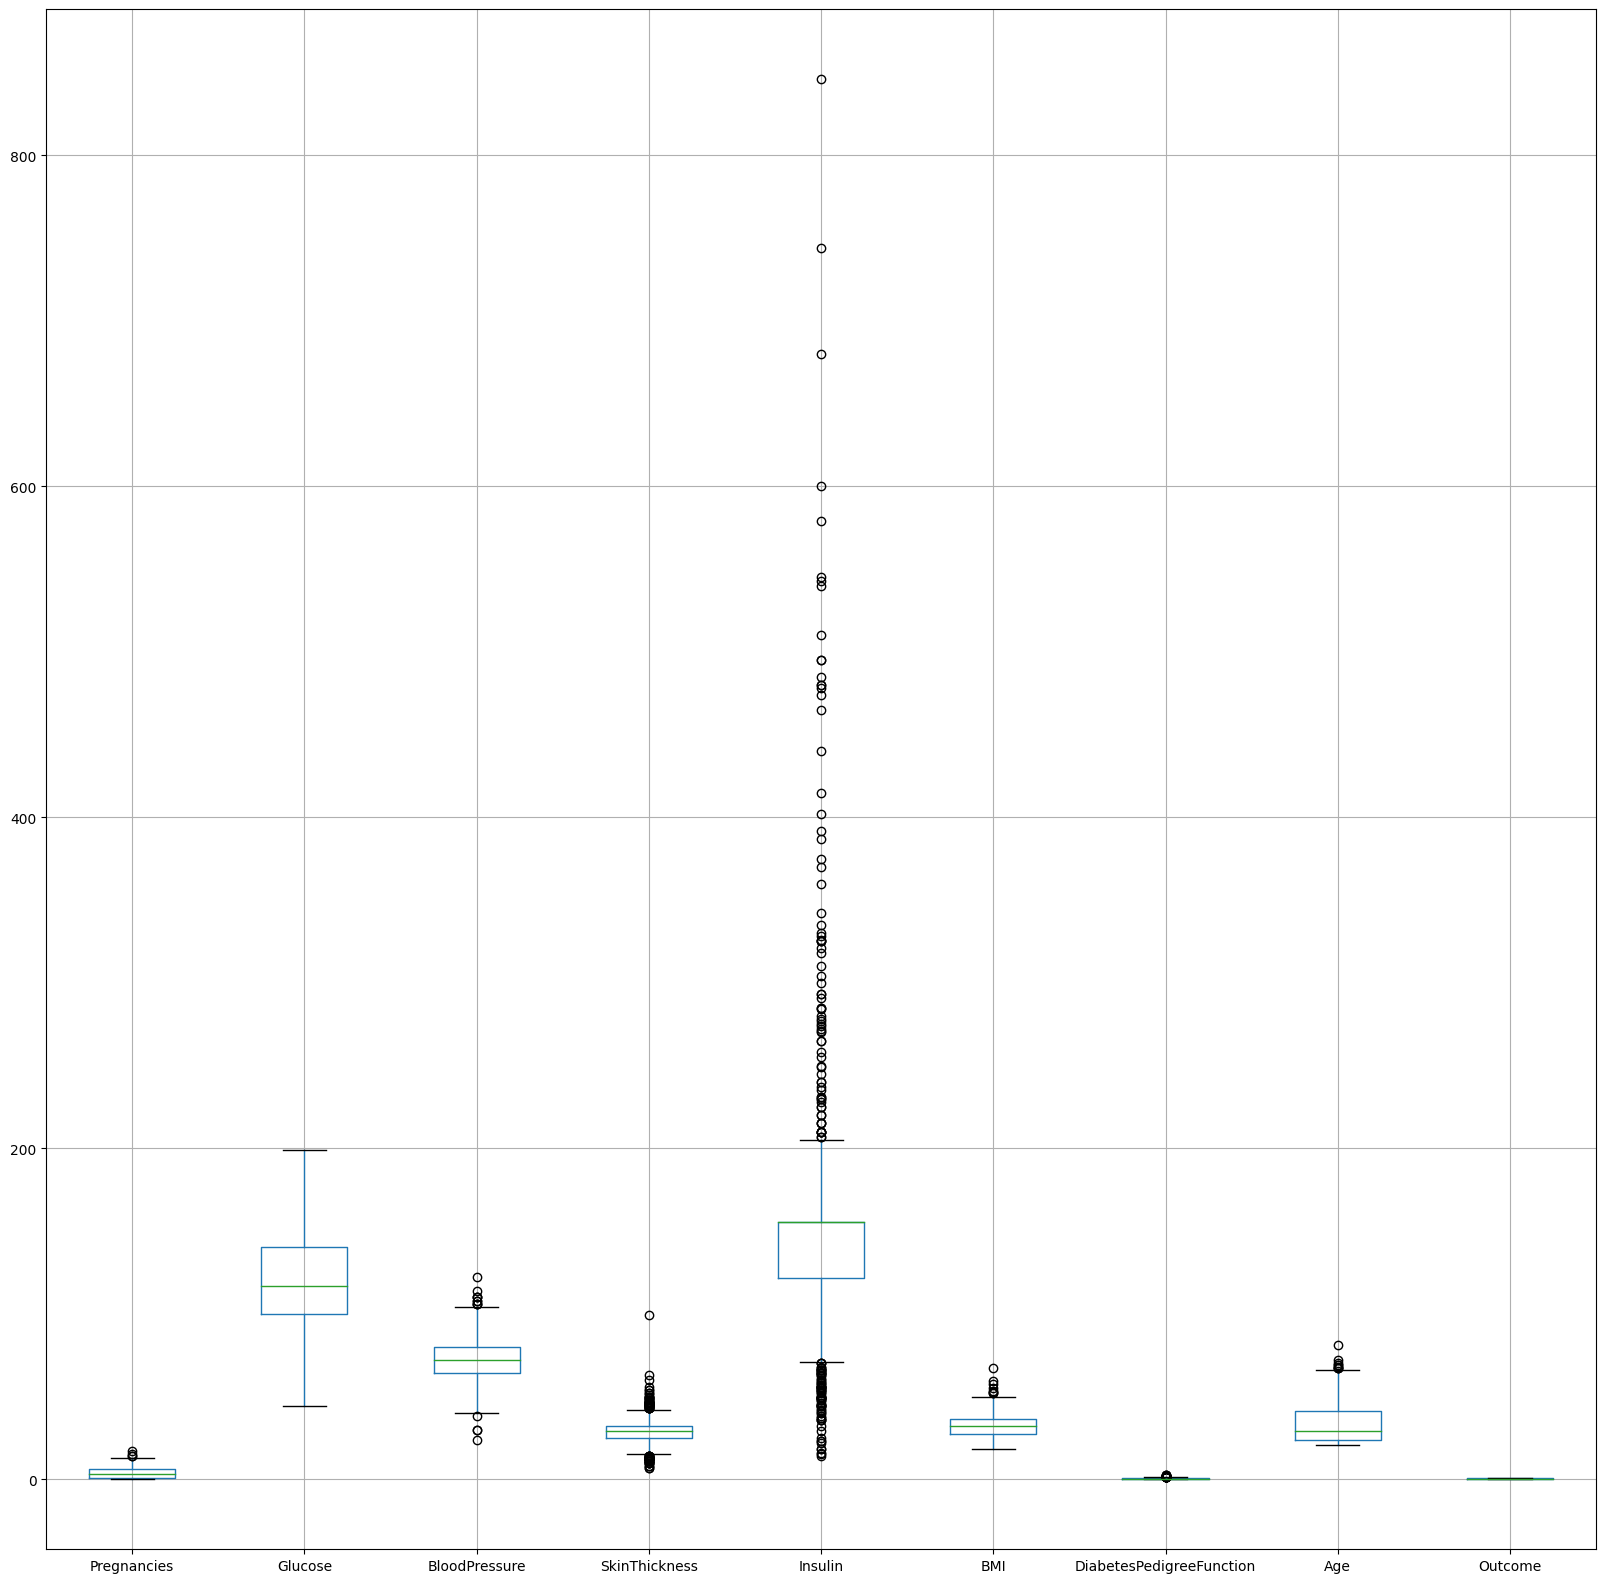

In [29]:
df.boxplot(figsize=(20,20))
plt.show()

In [17]:
## removing outliers in pregnancies column
max_threshold, min_threshold = df['Pregnancies'].quantile([0.75,0.25])
df_new = df[(df.Pregnancies>min_threshold) & (df.Pregnancies<max_threshold)]

In [18]:
max_threshold, min_threshold = df['BloodPressure'].quantile([0.75,0.25])
df_new = df[(df.BloodPressure>min_threshold) & (df.BloodPressure<max_threshold)]

In [19]:
max_threshold, min_threshold = df['SkinThickness'].quantile([0.75,0.25])
df_new = df[(df.SkinThickness>min_threshold) & (df.SkinThickness<max_threshold)]

In [20]:
max_threshold, min_threshold = df['Insulin'].quantile([0.75,0.25])
df_new = df[(df.Insulin>min_threshold) & (df.Insulin<max_threshold)]

In [21]:
max_threshold, min_threshold = df['BMI'].quantile([0.75,0.25])
df_new = df[(df.BMI>min_threshold) & (df.BMI<max_threshold)]

In [22]:
max_threshold, min_threshold = df['DiabetesPedigreeFunction'].quantile([0.75,0.25])
df_new = df[(df.DiabetesPedigreeFunction>min_threshold) & (df.DiabetesPedigreeFunction<max_threshold)]

In [23]:
max_threshold, min_threshold = df['Age'].quantile([0.75,0.25])
df_new = df[(df.Age>min_threshold) & (df.Age<max_threshold)]

In [24]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
756,7,137.0,90.0,41.00000,155.548223,32.0,0.391,39,0
758,1,106.0,76.0,29.15342,155.548223,37.5,0.197,26,0
762,9,89.0,62.0,29.15342,155.548223,22.5,0.142,33,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
